# (Stock) Index Creation and Analysis

## Data Import, Visualization & Normalization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

C:\Users\97250\AppData\Local\Temp\ipykernel_20368\2589572170.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
# Download the instruments
stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     start = "2014-01-01", end = "2018-12-31")

[*********************100%%**********************]  6 of 6 completed


In [4]:
stocks.head()

Adj Close                                 Close               \
                AMZN     BA   DIS    IBM    KO  MSFT  AMZN     BA   DIS   
Date                                                                      
2014-01-02     19.90 116.81 70.19 116.57 29.84 31.29 19.90 136.67 76.27   
2014-01-03     19.82 117.62 70.05 117.27 29.69 31.08 19.82 137.62 76.11   
2014-01-06     19.68 118.30 69.78 116.87 29.55 30.42 19.68 138.41 75.82   
2014-01-07     19.90 120.09 70.26 119.20 29.64 30.66 19.90 140.51 76.34   
2014-01-08     20.10 120.35 69.23 118.10 29.31 30.11 20.10 140.82 75.22   

                   ...  Open                       Volume                     \
              IBM  ...   DIS    IBM    KO  MSFT      AMZN       BA       DIS   
Date               ...                                                         
2014-01-02 177.37  ... 76.04 178.98 41.12 37.35  42756000  3366700   5200900   
2014-01-03 178.43  ... 76.30 177.66 40.68 37.20  44204000  3177400   4060700   
2014-01-06 177.82  ... 76.53 178.92 40.48 36.85  63412000  4196500   6816200   
2014-01-07 181.37  ... 76.12 178.19 40.48 36.33  38320000  4238500   4494900   
2014-01-08 179.70  ... 76.13 181.00 40.44 36.00  46330000  4236100  10900300   

                                         
                IBM        KO      MSFT  
Date                                     
2014-01-02  4755639  12698600  30632200  
2014-01-03  4250107  10403400  31134800  
2014-01-06  4254919  11036300  43603700  
2014-01-07  6205186  11872300  35802800  
2014-01-08  4815470  15339600  59971700  

[5 rows x 36 columns]

In [5]:
stocks.tail()

Adj Close                                 Close                \
                AMZN     BA    DIS   IBM    KO  MSFT  AMZN     BA    DIS   
Date                                                                       
2018-12-21     68.87 295.93 102.96 83.10 41.02 93.28 68.87 304.55 104.22   
2018-12-24     67.20 285.83  99.14 80.58 39.63 89.39 67.20 294.16 100.35   
2018-12-26     73.54 305.04 104.55 83.44 40.48 95.49 73.54 313.93 105.83   
2018-12-27     73.08 308.16 105.23 85.23 40.98 96.08 73.08 317.14 106.52   
2018-12-28     73.90 307.43 106.00 84.67 40.70 95.33 73.90 316.38 107.30   

                   ...   Open                         Volume           \
              IBM  ...    DIS    IBM    KO   MSFT       AMZN       BA   
Date               ...                                                  
2018-12-21 106.06  ... 106.47 107.55 47.26 101.63  272806000  7641700   
2018-12-24 102.84  ... 103.23 105.07 47.62  97.68  144400000  3435300   
2018-12-26 106.49  ... 100.49 103.25 45.88  95.14  208236000  4843400   
2018-12-27 108.78  ... 104.41 105.15 46.74  99.30  194440000  4341100   
2018-12-28 108.06  ... 107.28 109.20 47.89 102.09  176580000  3725200   

                                                     
                 DIS       IBM        KO       MSFT  
Date                                                 
2018-12-21  15530600  10864279  32477700  111242100  
2018-12-24   7133000   3997184  10733700   43935200  
2018-12-26   9422800   6951507  14342600   51634800  
2018-12-27   8201400   6323698  16966500   49498500  
2018-12-28   7620500   5352905  13218200   38196300  

[5 rows x 36 columns]

In [6]:
stocks.to_csv("index_stocks.csv")

In [55]:
# Read csv, selecting only the close price
stocks = pd.read_csv("index_stocks.csv", 
                     header = [0,1], 
                     index_col = [0], 
                     parse_dates = [0]).Close

In [56]:
stocks

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76
...,...,...,...,...,...,...
2018-12-21,68.87,304.55,104.22,106.06,47.57,98.23
2018-12-24,67.20,294.16,100.35,102.84,45.96,94.13
2018-12-26,73.54,313.93,105.83,106.49,46.94,100.56


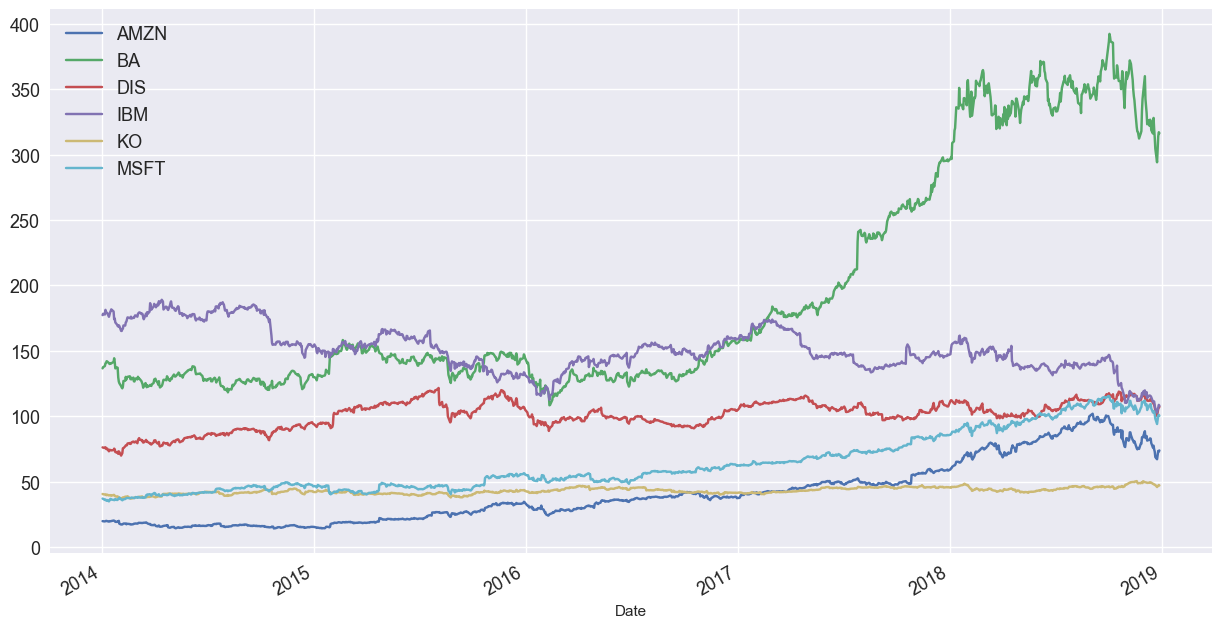

In [57]:
# Plot the close price 
# ..we need to normalize that.. (very hard to compare - no in the same base)
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [58]:
# Normalize
norm = stocks / stocks.iloc[0] * (100)
norm

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23
...,...,...,...,...,...,...
2018-12-21,346.12,222.84,136.65,59.80,116.99,264.34
2018-12-24,337.70,215.23,131.57,57.98,113.03,253.31
2018-12-26,369.60,229.70,138.76,60.04,115.45,270.61


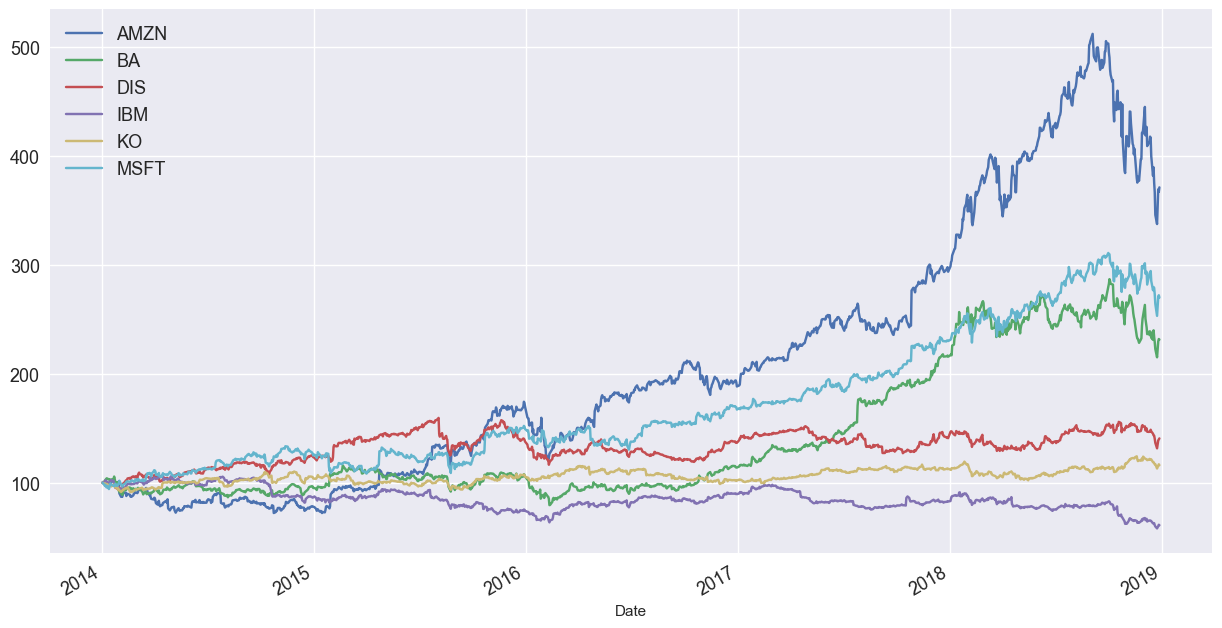

In [59]:
norm.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

---

# Creating a Price-weighted Index

In [60]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [61]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23


In [62]:
stocks.sum(axis = 1)[0]

C:\Users\97250\AppData\Local\Temp\ipykernel_20368\2065854558.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stocks.sum(axis = 1)[0]


488.0294361114502

In [63]:
# the way to create price weigthed index:
# 1. sum all the stocks price in a specific time (e.g, in 2014-01-02)
# 2. devide each stock price (in this time) by the sum of all the stocks (in this time)
# 3. multiply by 100 (base of 100)
stocks.sum(axis = 1).div(stocks.sum(axis = 1)[0]).mul(100) 

C:\Users\97250\AppData\Local\Temp\ipykernel_20368\3330613241.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stocks.sum(axis = 1).div(stocks.sum(axis = 1)[0]).mul(100)


Date
2014-01-02   100.00
2014-01-03   100.27
2014-01-06   100.02
2014-01-07   101.41
2014-01-08   100.72
              ...  
2018-12-21   149.48
2018-12-24   144.38
2018-12-26   153.13
2018-12-27   154.55
2018-12-28   154.34
Length: 1257, dtype: float64

In [64]:
# again,
# the way to create price weigthed index:
# 1. sum all the stocks price in a specific time (e.g, in 2014-01-02)
# 2. devide each stock price (in this time) by the sum of all the stocks (in this time)
# 3. multiply by 100 (base of 100)
norm["PWI"] = stocks.sum(axis = 1).div(stocks.sum(axis = 1)[0]).mul(100)

C:\Users\97250\AppData\Local\Temp\ipykernel_20368\704547784.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm["PWI"] = stocks.sum(axis = 1).div(stocks.sum(axis = 1)[0]).mul(100)


In [65]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72


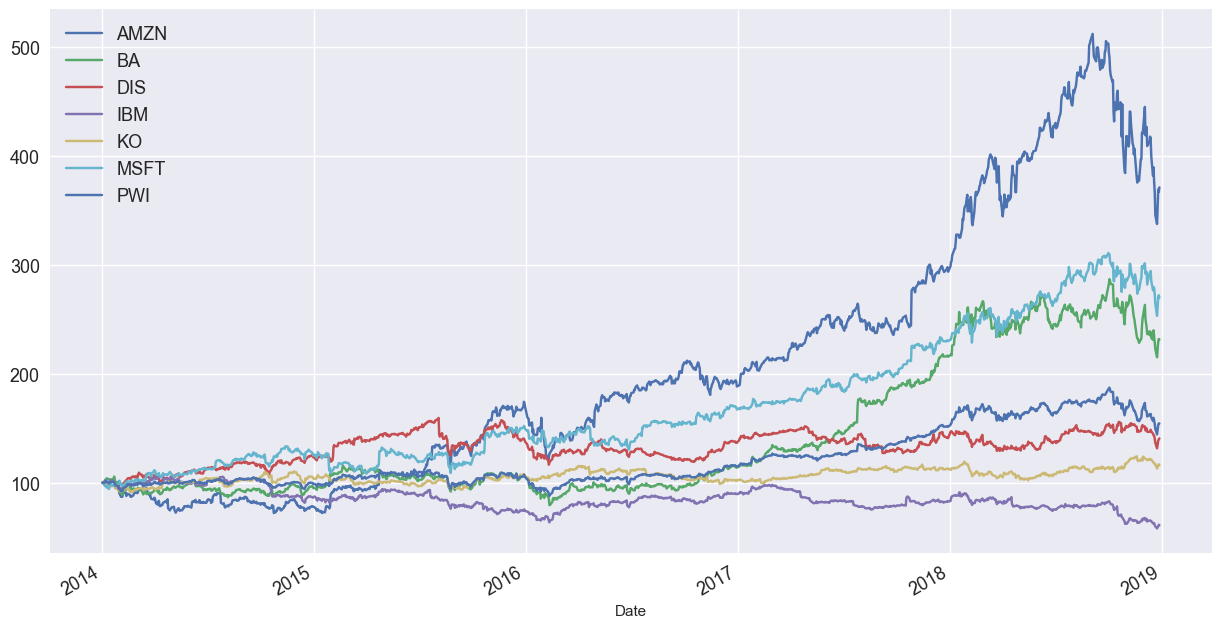

In [66]:
# we plot all the instumrnts, and the Price weigted index: 
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

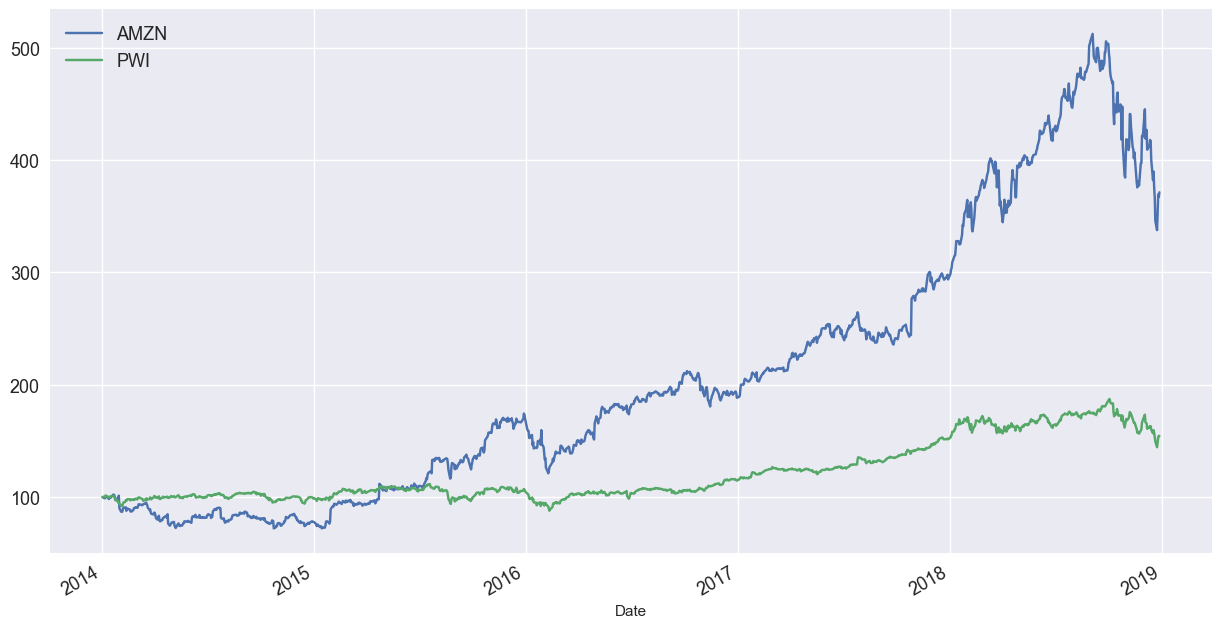

In [67]:
# Plot the Amazon stock and the Price wegted index
norm.loc[:, ["AMZN", "PWI"]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

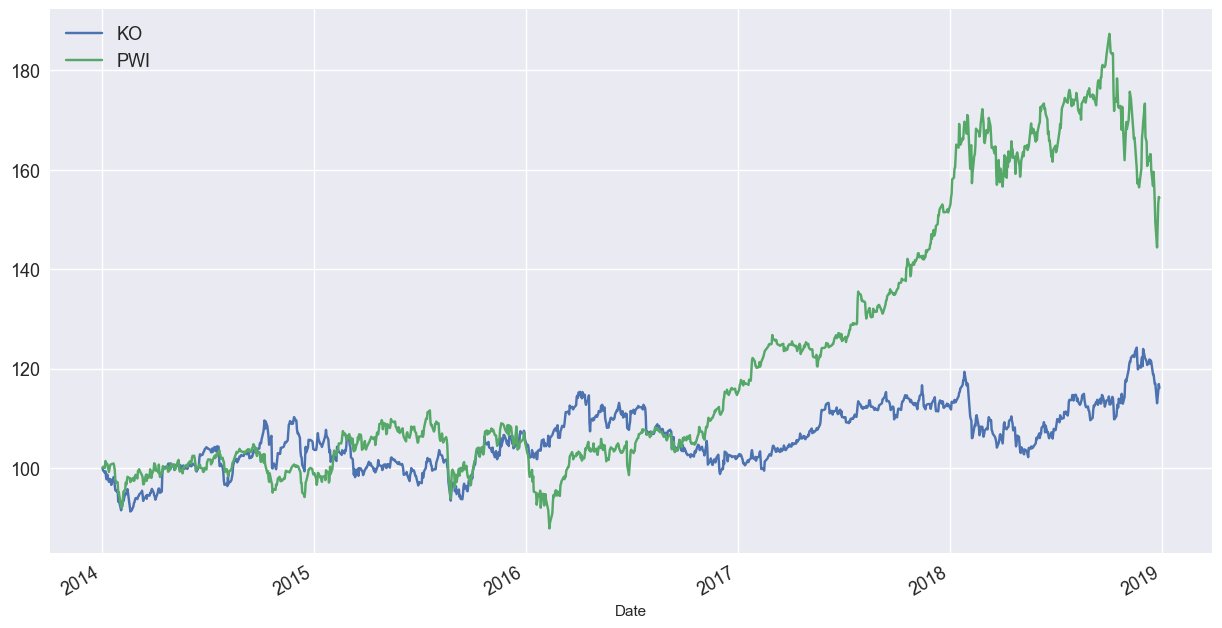

In [68]:
# Plot the BO stock and the Price wegted index
norm.loc[:, ["KO", "PWI"]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [69]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [70]:
# Price weighted index calculation, without base of 100: 
stocks.div(stocks.sum(axis = 1), axis = "rows")

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-03,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-06,0.04,0.28,0.16,0.36,0.08,0.07
2014-01-07,0.04,0.28,0.15,0.37,0.08,0.07
2014-01-08,0.04,0.29,0.15,0.37,0.08,0.07
...,...,...,...,...,...,...
2018-12-21,0.09,0.42,0.14,0.15,0.07,0.13
2018-12-24,0.10,0.42,0.14,0.15,0.07,0.13
2018-12-26,0.10,0.42,0.14,0.14,0.06,0.13


In [71]:
# get the actual weigths:
# Price weighted index calculation, without base of 100
weights_PWI = stocks.div(stocks.sum(axis = 1), axis = "rows")

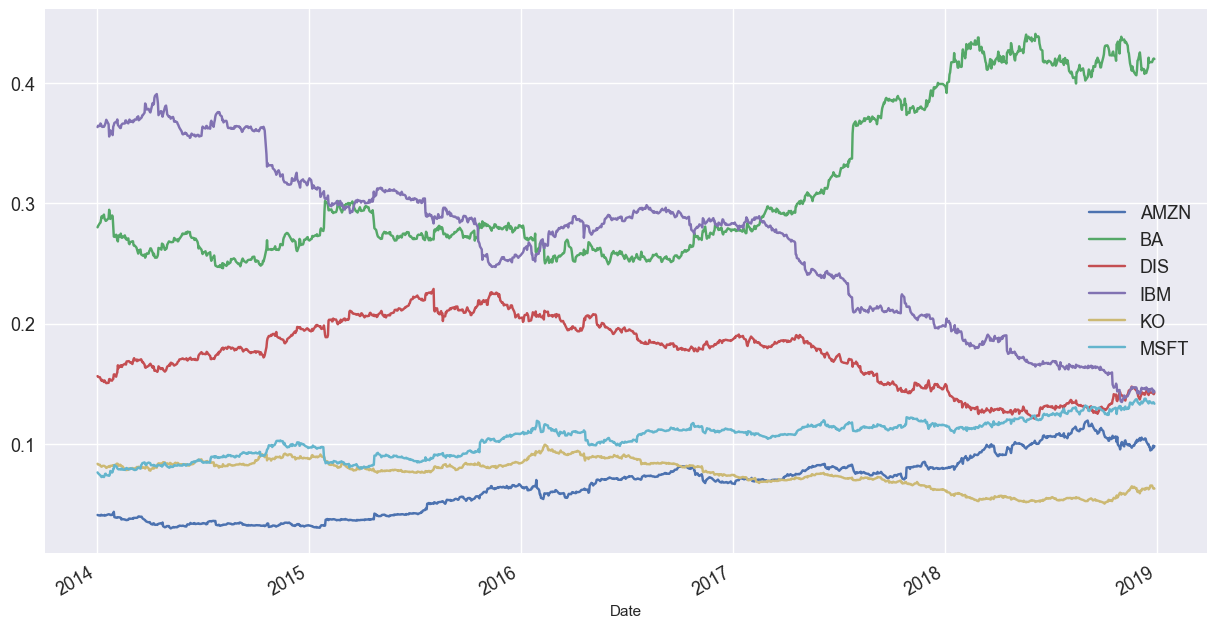

In [72]:
# Plot the weigths over the time
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# Interpretation
# you cab see that over the time the Price weigthed index chagne.
# actually, the weigths of each instrument change as the price change. 
# For example, the stock that its weights is most change is MSFT, or DIS

---

# Creating an Equal-weighted Index

In [73]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [74]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72


In [75]:
# Compute the simple return 
ret = stocks.pct_change().dropna()

In [76]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01


In [77]:
# EWI step 1:
# Compute the mean return over each row. 
ret["Mean_ret"] = ret.mean(axis = 1)

In [78]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,Mean_ret
Date,,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01,-0.00
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02,-0.01
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02,-0.01
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.00


In [79]:
# EWI step 2:
# Create an Equal Weigted Index column 
norm["EWI"] = 100

In [80]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,100
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,100
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,100


In [81]:
# EWI step 3:
# compute the compund return  
ret.Mean_ret.add(1).cumprod().mul(100)

Date
2014-01-03    99.92
2014-01-06    99.35
2014-01-07   100.41
2014-01-08    99.72
2014-01-09    99.52
              ...  
2018-12-21   175.33
2018-12-24   169.44
2018-12-26   179.08
2018-12-27   180.59
2018-12-28   180.44
Name: Mean_ret, Length: 1256, dtype: float64

In [ ]:
norm.iloc[1:, -1] = ret.Mean_ret.add(1).cumprod().mul(100)

In [83]:
norm

# here's also the EWI:

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72
...,...,...,...,...,...,...,...,...
2018-12-21,346.12,222.84,136.65,59.80,116.99,264.34,149.48,175.33
2018-12-24,337.70,215.23,131.57,57.98,113.03,253.31,144.38,169.44
2018-12-26,369.60,229.70,138.76,60.04,115.45,270.61,153.13,179.08


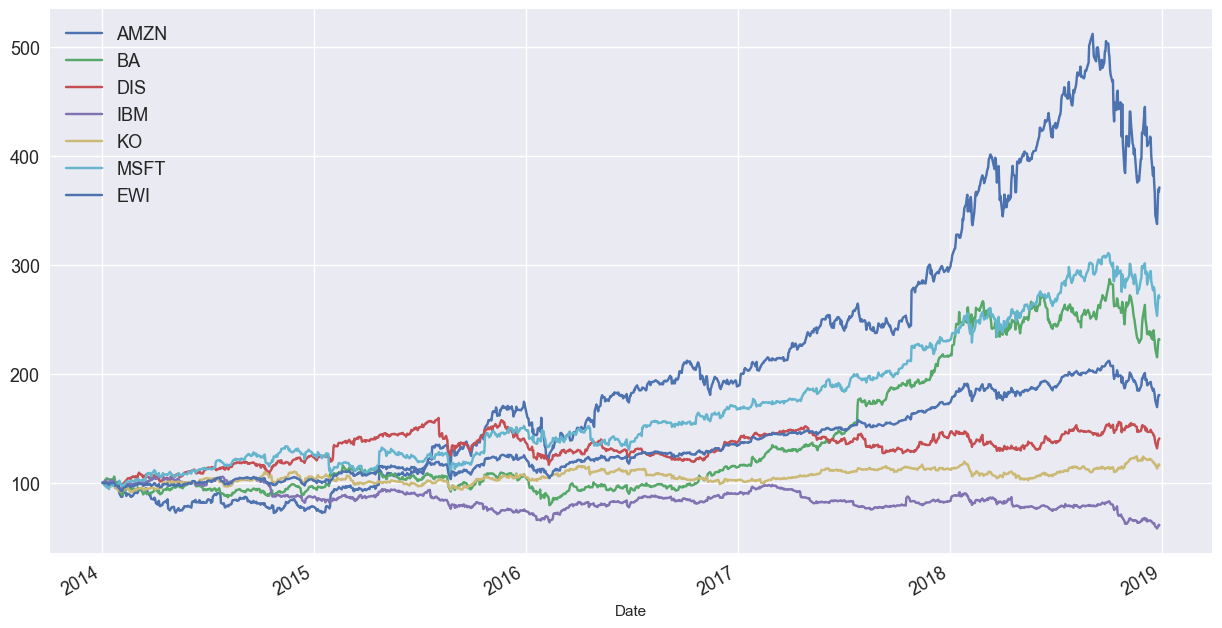

In [84]:
# Plot the instruments and the EWI 
norm.iloc[:, [0, 1, 2, 3, 4, 5, 7]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# EWI its literly just take the mean return of all the returns stocks. 

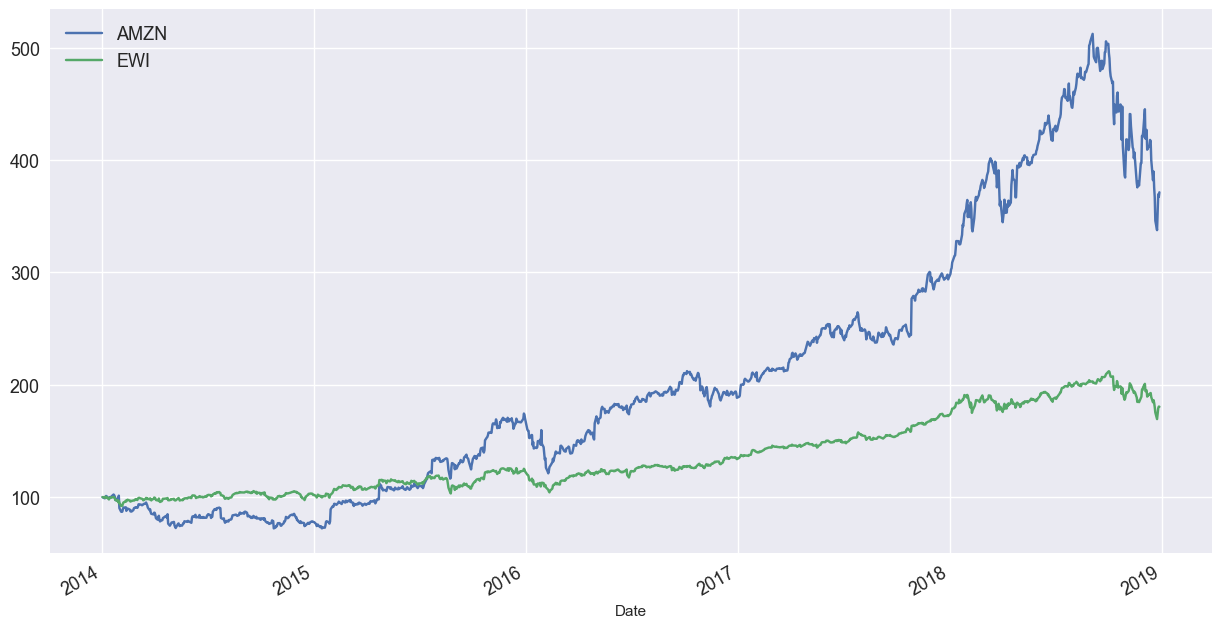

In [85]:
norm.loc[:, ["AMZN", "EWI"]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

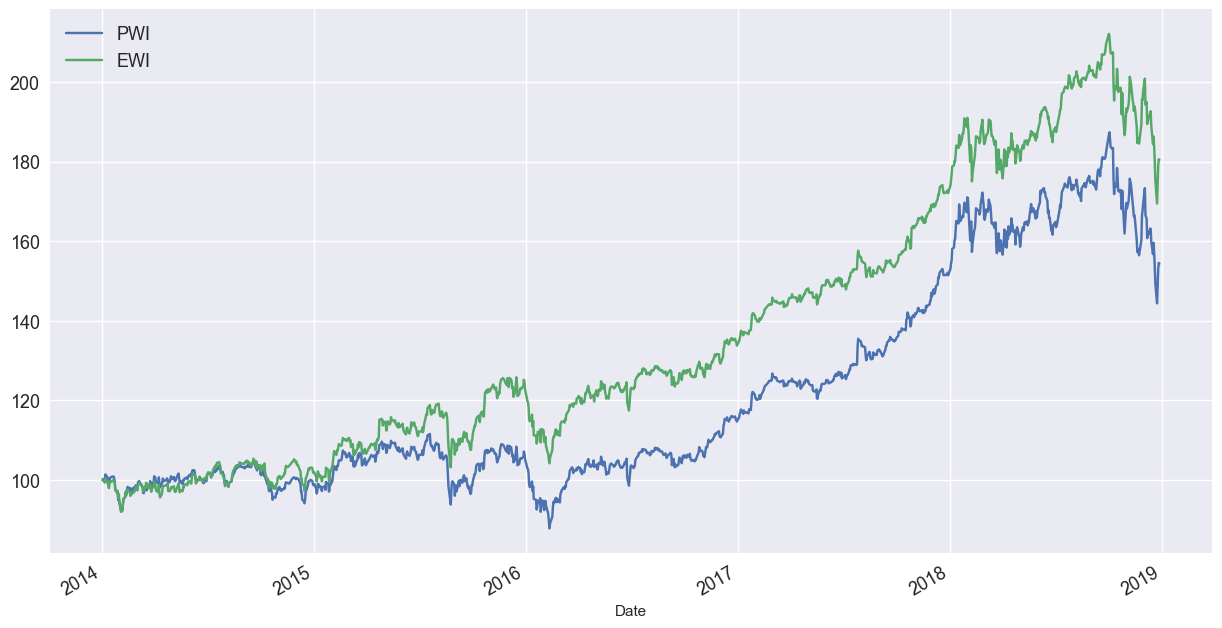

In [86]:
# Plot and compare the Price weigted index and the Equal weigthed index 
norm.iloc[:, -2:].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__The weights not change over time. they are allwats equal__

In [91]:
weights_EWI = stocks.copy()

In [92]:
weights_EWI.iloc[:,:] = (1/6)

In [93]:
weights_EWI

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-03,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-06,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-07,0.17,0.17,0.17,0.17,0.17,0.17
2014-01-08,0.17,0.17,0.17,0.17,0.17,0.17
...,...,...,...,...,...,...
2018-12-21,0.17,0.17,0.17,0.17,0.17,0.17
2018-12-24,0.17,0.17,0.17,0.17,0.17,0.17
2018-12-26,0.17,0.17,0.17,0.17,0.17,0.17


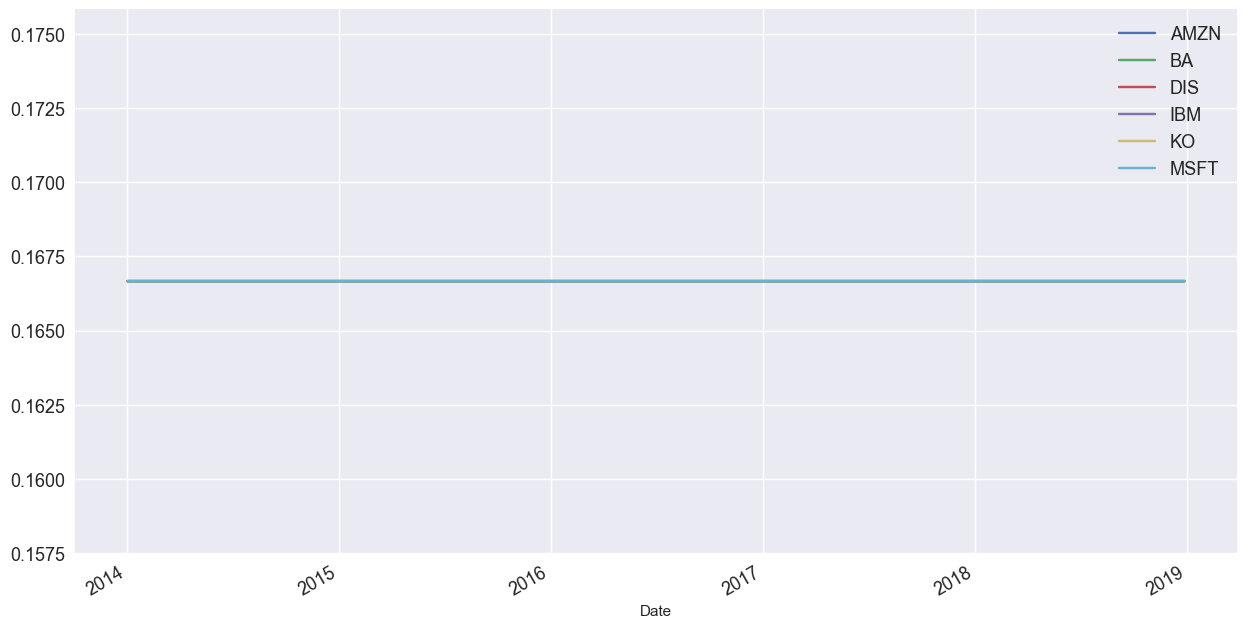

In [94]:
# weights do not change over time. they are allwats equal
weights_EWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

---

# Creating a Value-weighted Index (Part 1)

In [95]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [96]:
# Plot the instruments, and also the PWI and EWI 
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72


In [98]:
listings = pd.read_csv("../Data/listings_clean.csv")

In [99]:
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [100]:
listings.tail()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
6847,ZUMZ,NASDAQ,Zumiez Inc.,26.72,681919062.56,2005,Consumer Services,Clothing/Shoe/Accessory Stores
6848,ZUO,NYSE,"Zuora, Inc.",19.79,2147266454.00,2018,Technology,Computer Software: Prepackaged Software
6849,ZYME,NYSE,Zymeworks Inc.,15.74,504078206.26,2017,Health Care,Major Pharmaceuticals
6850,ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.85,165399468.60,2015,Health Care,Major Pharmaceuticals
6851,ZYXI,NASDAQ,"Zynex, Inc.",5.02,161834880.48,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


In [101]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852 entries, 0 to 6851
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6852 non-null   object 
 1   Exchange    6852 non-null   object 
 2   Name        6852 non-null   object 
 3   Last_Price  6852 non-null   float64
 4   Market_Cap  5954 non-null   float64
 5   IPO_Year    6852 non-null   int64  
 6   Sector      5309 non-null   object 
 7   Industry    5309 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 428.4+ KB


In [102]:
listings.set_index("Symbol", inplace = True)

In [103]:
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [104]:
ticker = ["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"]

In [105]:
# Extract the specific tickers, and take the last price and the market cap.
listings = listings.loc[ticker, ["Last_Price", "Market_Cap"]]

In [106]:
listings

,Last_Price,Market_Cap
Symbol,,
AMZN,1847.33,907413834783.70
BA,364.94,206002047212.28
DIS,117.16,210609322989.68
IBM,143.02,127268671933.12
KO,46.64,199393520886.56
MSFT,120.19,922123334074.74


In [107]:
# Calculate the amount of shares:
# market cap / share price = total number of shares 
listings.Market_Cap.div(listings.Last_Price)

Symbol
AMZN    491202890.00
BA      564481962.00
DIS    1797621398.00
IBM     889866256.00
KO     4275161254.00
MSFT   7672213446.00
dtype: float64

In [108]:
# Create new column of shares for each stock
listings["Shares"] = listings.Market_Cap.div(listings.Last_Price)

In [109]:
listings
# so far we have the market cap, last price, and total shares (for each instrument).

,Last_Price,Market_Cap,Shares
Symbol,,,
AMZN,1847.33,907413834783.70,491202890.00
BA,364.94,206002047212.28,564481962.00
DIS,117.16,210609322989.68,1797621398.00
IBM,143.02,127268671933.12,889866256.00
KO,46.64,199393520886.56,4275161254.00
MSFT,120.19,922123334074.74,7672213446.00


In [119]:
1847.33 * 491202890.00 == 907413834783.70

True

In [110]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,19.90,136.67,76.27,177.37,40.66,37.16
2014-01-03,19.82,137.62,76.11,178.43,40.46,36.91
2014-01-06,19.68,138.41,75.82,177.82,40.27,36.13
2014-01-07,19.90,140.51,76.34,181.37,40.39,36.41
2014-01-08,20.10,140.82,75.22,179.70,39.94,35.76


In [111]:
stocks.tail()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2018-12-21,68.87,304.55,104.22,106.06,47.57,98.23
2018-12-24,67.20,294.16,100.35,102.84,45.96,94.13
2018-12-26,73.54,313.93,105.83,106.49,46.94,100.56
2018-12-27,73.08,317.14,106.52,108.78,47.53,101.18
2018-12-28,73.90,316.38,107.30,108.06,47.20,100.39


In [112]:
# So for compute the market cap, we:
# for each instrument, 
# stock price * total number of shares 
mcap = stocks.mul(listings.Shares, axis = "columns")

In [113]:
# See the market cap of each instrument over the time
mcap.head()

# Over the time, the market cap change as the stock price change. 

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,9774200924.02,77147748712.94,137104577990.96,157836415335.12,173828055935.30,285099450482.67
2014-01-03,9736623932.92,77684004854.18,136816965698.96,158780730499.91,172973020422.81,283181397121.17
2014-01-06,9667609424.70,78129950427.61,136295653847.77,158236254990.28,172160745655.59,277197079998.79
2014-01-07,9775674660.11,79315357379.83,137230410940.23,161392472210.47,172673760439.71,279345290398.17
2014-01-08,9871213607.23,79490354023.23,135217083751.92,159912195118.54,170749934613.72,274358339951.40


In [114]:
mcap.tail()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2018-12-21,33830369842.30,171912974636.45,187348104293.92,94380272044.79,203369419548.10,753641552555.69
2018-12-24,33007850842.84,166048016009.11,180391304546.35,91513299376.99,196486407319.81,722185430599.62
2018-12-26,36125515645.63,177207818196.27,190242275841.88,94763098113.24,200676063391.72,771517765398.77
2018-12-27,35898089966.75,179019817697.46,191482625280.46,96796350719.01,203198409183.92,776274558807.65
2018-12-28,36300385253.58,178590805893.82,192884781491.31,96158300482.46,201787614450.49,770213503161.19


In [115]:
mcap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2014-01-02 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1257 non-null   float64
 1   BA      1257 non-null   float64
 2   DIS     1257 non-null   float64
 3   IBM     1257 non-null   float64
 4   KO      1257 non-null   float64
 5   MSFT    1257 non-null   float64
dtypes: float64(6)
memory usage: 68.7 KB


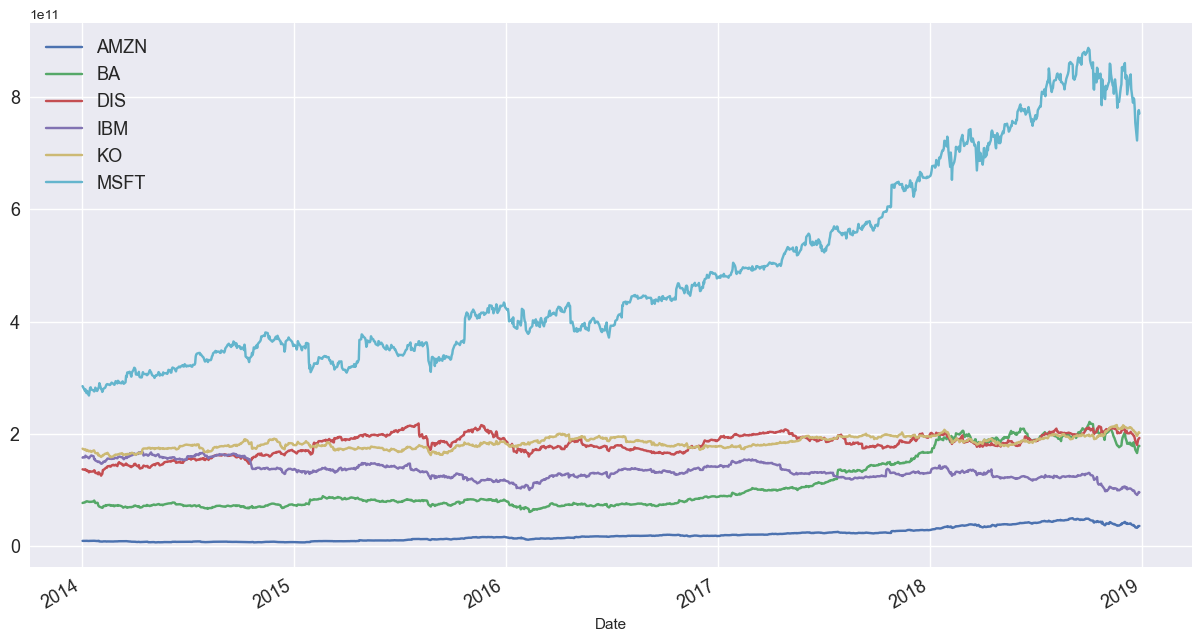

In [116]:
# Plot the market cap over the time of each instrument. 
mcap.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# you can see that the market cap of MSFT over the time increased. 

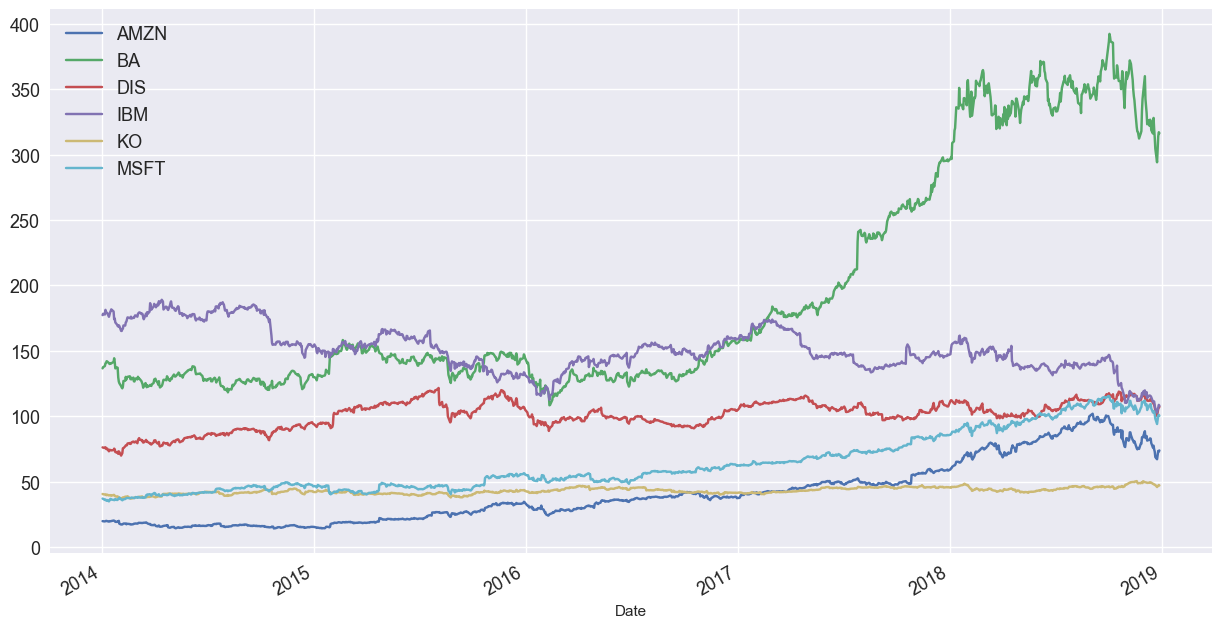

In [117]:
# Plot the stock price evulution of each instrument.
stocks.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

---

# Creating a Value-weighted Index (Part 2)

In [120]:
# Market capitalization of our constituents over the time 
mcap.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,9774200924.02,77147748712.94,137104577990.96,157836415335.12,173828055935.30,285099450482.67
2014-01-03,9736623932.92,77684004854.18,136816965698.96,158780730499.91,172973020422.81,283181397121.17
2014-01-06,9667609424.70,78129950427.61,136295653847.77,158236254990.28,172160745655.59,277197079998.79
2014-01-07,9775674660.11,79315357379.83,137230410940.23,161392472210.47,172673760439.71,279345290398.17
2014-01-08,9871213607.23,79490354023.23,135217083751.92,159912195118.54,170749934613.72,274358339951.40


In [121]:
# Take the sum of the market cap over the time of all the instruments 
mcap.sum(axis = 1)

Date
2014-01-02    840790449381.03
2014-01-03    839172742529.96
2014-01-06    831687294344.75
2014-01-07    839732966028.52
2014-01-08    829599121066.04
                   ...       
2018-12-21   1444482692921.26
2018-12-24   1389632308694.72
2018-12-26   1470532536587.51
2018-12-27   1482669851655.26
2018-12-28   1475935390732.85
Length: 1257, dtype: float64

In [122]:
# for calculate the wegiths of VWI:
# For calculate the Value weigthed index, we need to:
# instrument Mcap / total sum Mcap of all instrument in the index. 
mcap.div(mcap.sum(axis = 1), axis = "index")

# This is give us the wegith for each instrument, based on its market cap
# the bigger market cap -> the bigger wegith 
# the smaller market cap -> the smaller wegith  

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.01,0.09,0.16,0.19,0.21,0.34
2014-01-03,0.01,0.09,0.16,0.19,0.21,0.34
2014-01-06,0.01,0.09,0.16,0.19,0.21,0.33
2014-01-07,0.01,0.09,0.16,0.19,0.21,0.33
2014-01-08,0.01,0.10,0.16,0.19,0.21,0.33
...,...,...,...,...,...,...
2018-12-21,0.02,0.12,0.13,0.07,0.14,0.52
2018-12-24,0.02,0.12,0.13,0.07,0.14,0.52
2018-12-26,0.02,0.12,0.13,0.06,0.14,0.52


In [123]:
# again,
# for calculate the wegiths of VWI:
# For calculate the Value weigthed index, we need to:
# instrument Mcap / total sum Mcap of all instrument in the index. 
weights_vwi = mcap.div(mcap.sum(axis = 1), axis = "index")

In [124]:
weights_vwi.tail()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2018-12-21,0.02,0.12,0.13,0.07,0.14,0.52
2018-12-24,0.02,0.12,0.13,0.07,0.14,0.52
2018-12-26,0.02,0.12,0.13,0.06,0.14,0.52
2018-12-27,0.02,0.12,0.13,0.07,0.14,0.52
2018-12-28,0.02,0.12,0.13,0.07,0.14,0.52


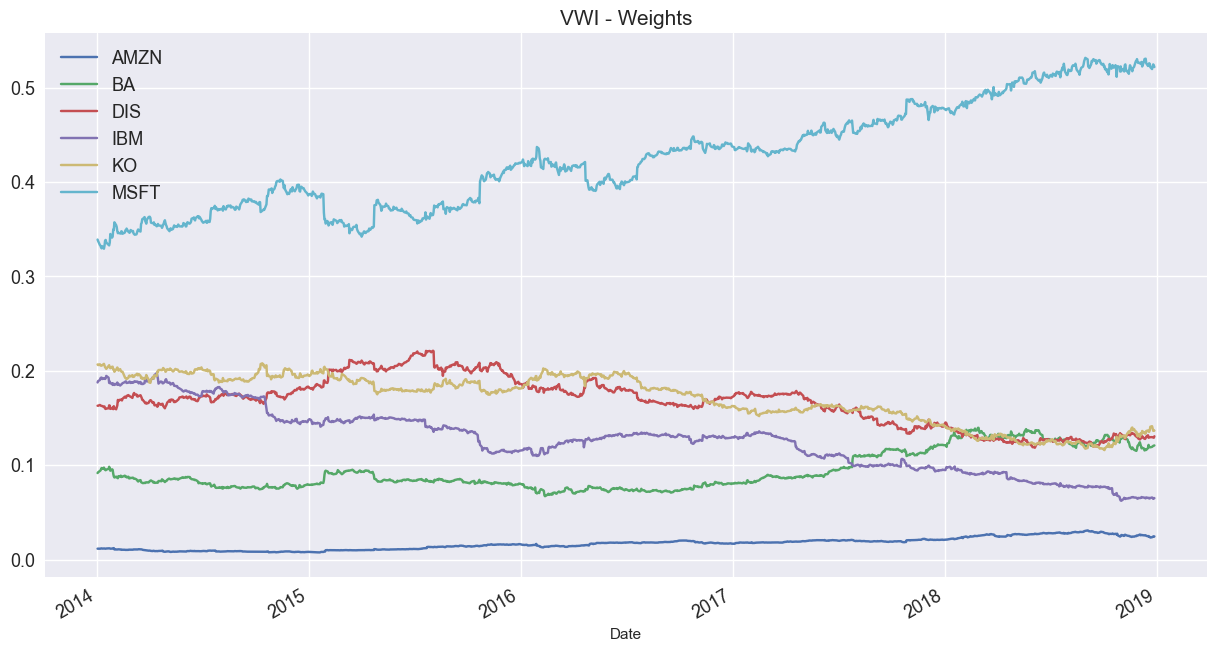

In [125]:
# The evulution of wegiths  

# Plot the Value Weighted index - 
# the weigths (based on Mcap) iver the time. 

weights_vwi.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("VWI - Weights", fontsize = 15)
plt.show()

# you can see that over the time the Mcap of microsoft increase.

In [126]:
# Compute daily the simple return of stocks prices
ret = stocks.pct_change().dropna()
ret

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01
...,...,...,...,...,...,...
2018-12-21,-0.06,-0.03,-0.03,-0.02,0.00,-0.03
2018-12-24,-0.02,-0.03,-0.04,-0.03,-0.03,-0.04
2018-12-26,0.09,0.07,0.05,0.04,0.02,0.07


In [127]:
# Why we need to shift the weigths one step ahead?
# because we calculate the return of the stock price.
weights_vwi.shift().dropna()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,0.01,0.09,0.16,0.19,0.21,0.34
2014-01-06,0.01,0.09,0.16,0.19,0.21,0.34
2014-01-07,0.01,0.09,0.16,0.19,0.21,0.33
2014-01-08,0.01,0.09,0.16,0.19,0.21,0.33
2014-01-09,0.01,0.10,0.16,0.19,0.21,0.33
...,...,...,...,...,...,...
2018-12-21,0.02,0.12,0.13,0.06,0.14,0.53
2018-12-24,0.02,0.12,0.13,0.07,0.14,0.52
2018-12-26,0.02,0.12,0.13,0.07,0.14,0.52


In [128]:
# compute the Value weigthed:
# (close price return of the instrument * its weigth) , and than sum all the row.   
ret.mul(weights_vwi.shift().dropna()).sum(axis = 1)

# so, this is the return of our Value weigthed index. 

Date
2014-01-03   -0.00
2014-01-06   -0.01
2014-01-07    0.01
2014-01-08   -0.01
2014-01-09   -0.00
              ... 
2018-12-21   -0.03
2018-12-24   -0.04
2018-12-26    0.06
2018-12-27    0.01
2018-12-28   -0.00
Length: 1256, dtype: float64

In [129]:
norm["VWI"] = 100
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI
Date,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92,100
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35,100
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41,100
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72,100


In [130]:
# Value weigthed index with base of 100
ret.mul(weights_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

Date
2014-01-03    99.81
2014-01-06    98.92
2014-01-07    99.87
2014-01-08    98.67
2014-01-09    98.31
              ...  
2018-12-21   171.80
2018-12-24   165.28
2018-12-26   174.90
2018-12-27   176.34
2018-12-28   175.54
Length: 1256, dtype: float64

In [131]:
norm.iloc[1:, -1] = ret.mul(weights_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

C:\Users\97250\AppData\Local\Temp\ipykernel_20368\4187886291.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 99.8075969   98.91730989  99.87422748 ... 174.89881547 176.34237553
 175.54140771]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm.iloc[1:, -1] = ret.mul(weights_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)


In [132]:
norm

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI
Date,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92,99.81
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35,98.92
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41,99.87
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72,98.67
...,...,...,...,...,...,...,...,...,...
2018-12-21,346.12,222.84,136.65,59.80,116.99,264.34,149.48,175.33,171.80
2018-12-24,337.70,215.23,131.57,57.98,113.03,253.31,144.38,169.44,165.28
2018-12-26,369.60,229.70,138.76,60.04,115.45,270.61,153.13,179.08,174.90


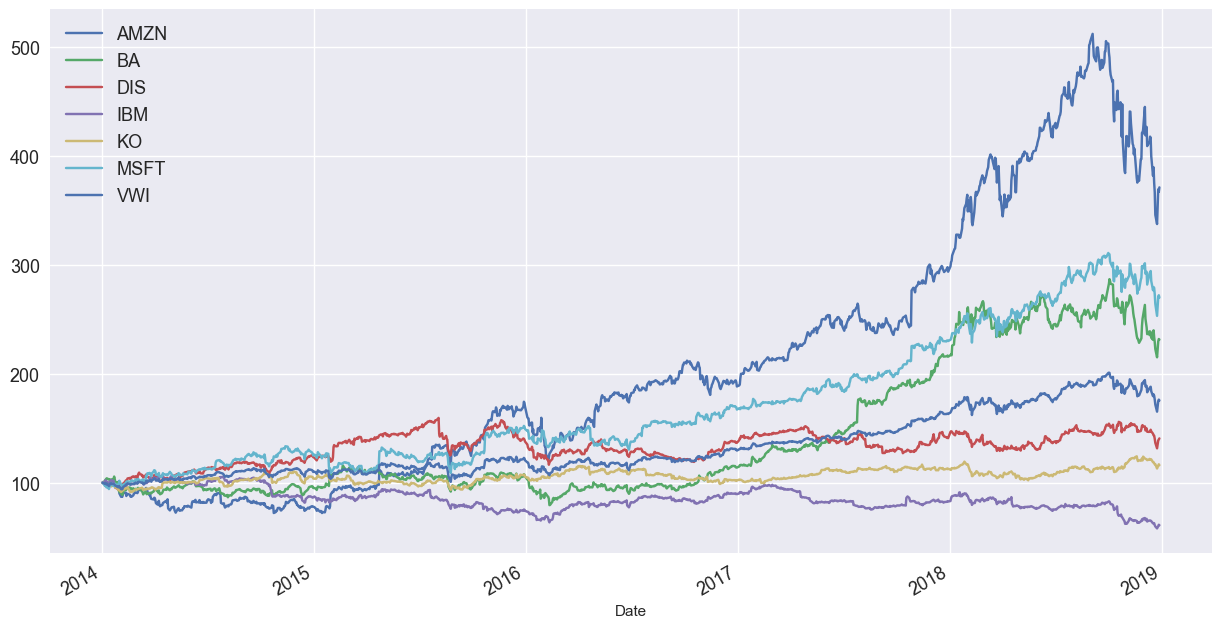

In [133]:
# Lets plot the instruments and the Value weigthed Index
norm.iloc[:, [0, 1, 2, 3, 4, 5, 8]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [134]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI
Date,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92,99.81
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35,98.92
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41,99.87
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72,98.67


---

# Comparison of weighting methods

In [135]:
norm.head()

# So far we have the price of each instrument,
# and also PWI, EWI, VWI

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI
Date,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92,99.81
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35,98.92
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41,99.87
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72,98.67


__plot `PWI`, `EWI`, `VWI`__

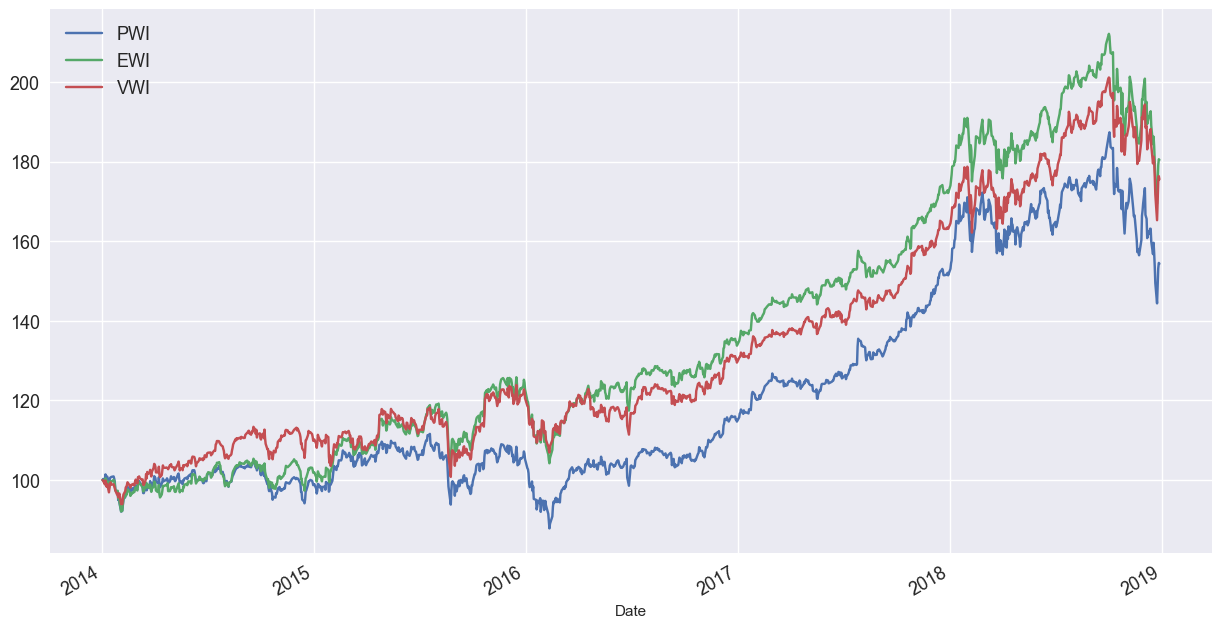

In [136]:
norm.iloc[:, -3:].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

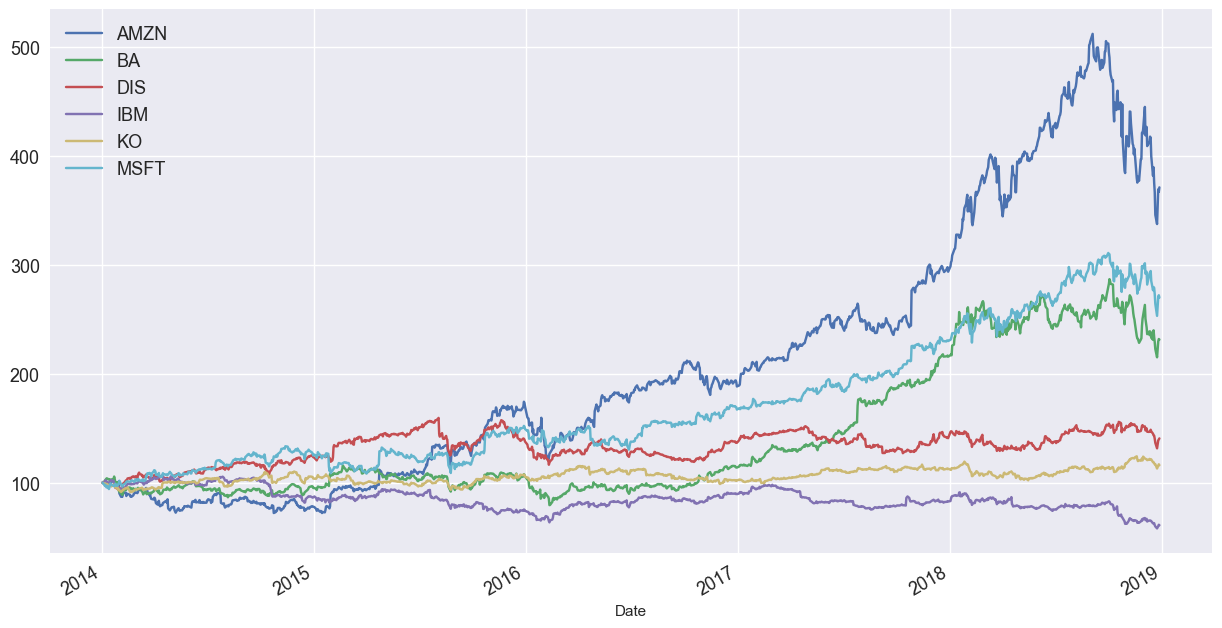

In [137]:
# Plot the instruments
norm.iloc[:, :-3].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Plot the evulution of wegiths over the time of `PWI`__
> The weigths change as the price of each instrument change.

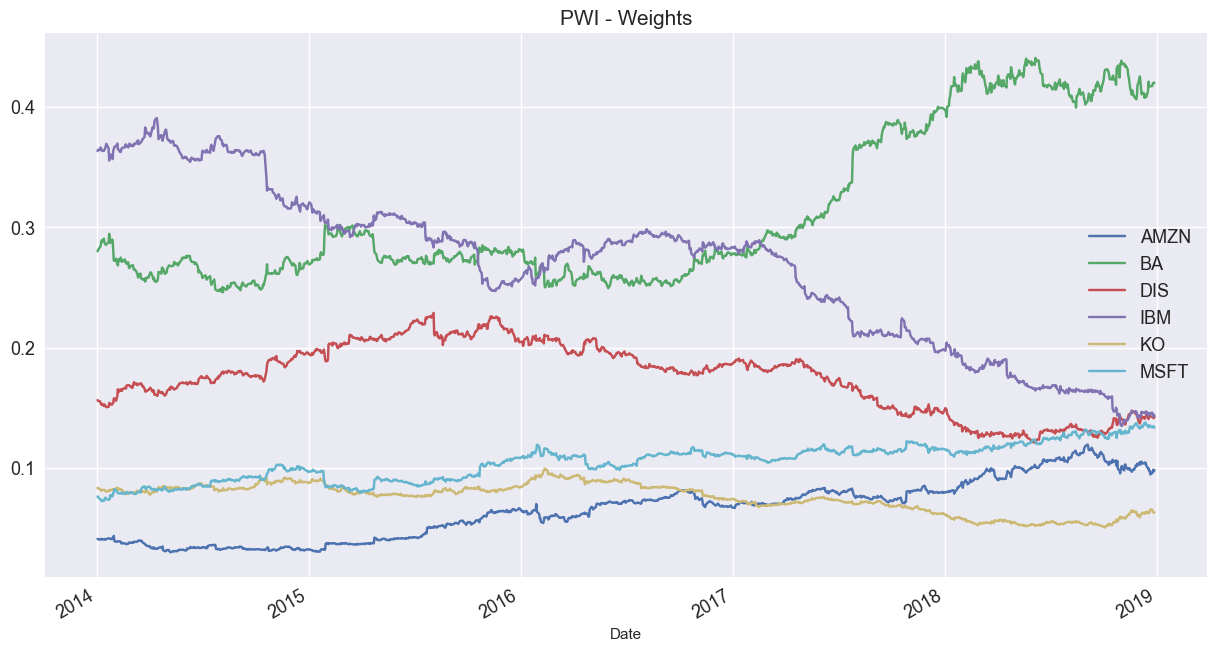

In [138]:
weights_PWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("PWI - Weights", fontsize = 15)
plt.show()

__Plot the evulution of wegiths over the time of `VWI`__
> The wegiths change as the Mcap if each instrument change.

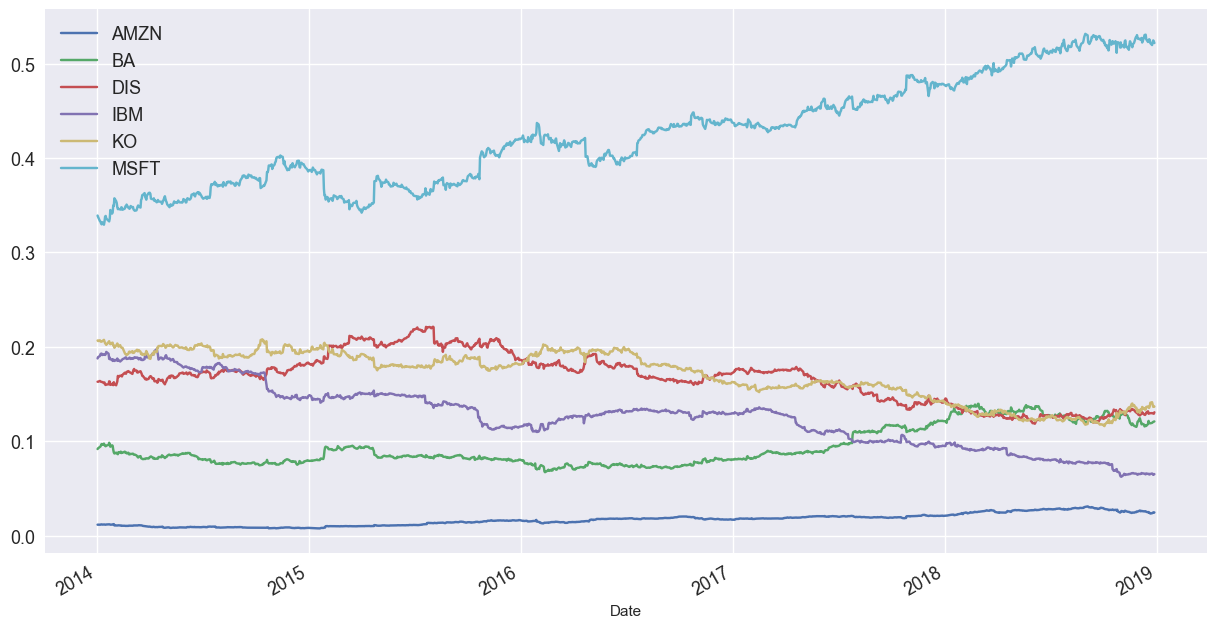

In [139]:
weights_vwi.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Plot the evulution of wegiths over the time of `EWI`__
> The wegiths do not change over the time. its allways equal. 

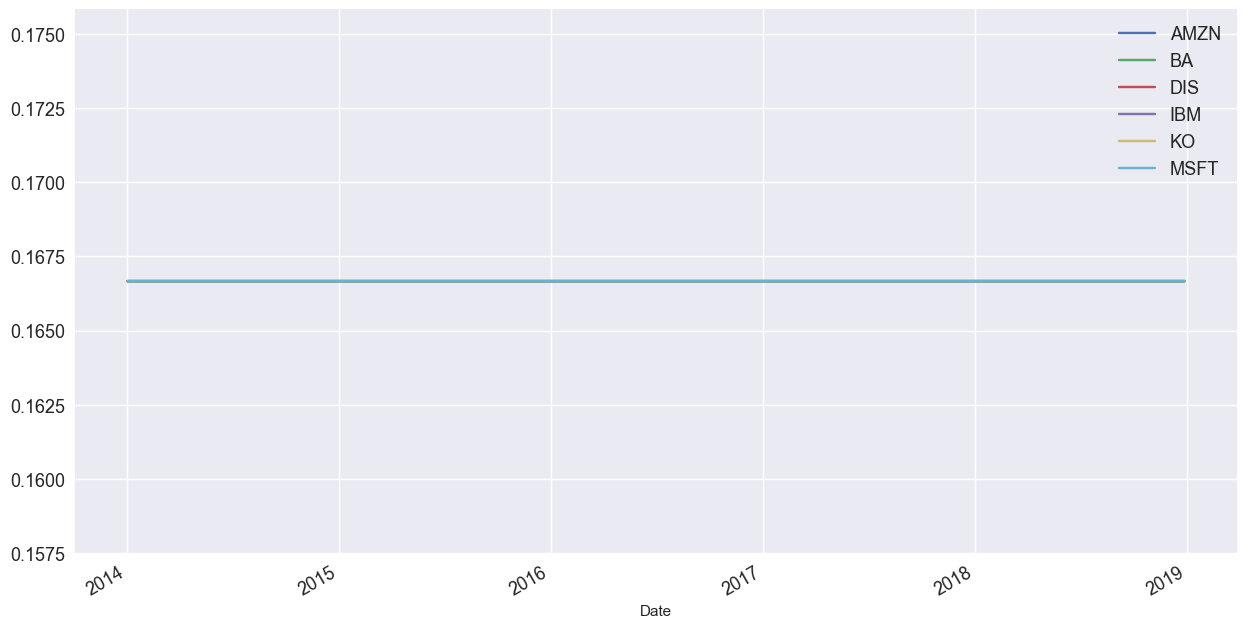

In [140]:
weights_EWI.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Mean Variance performance the instruments and the indexes__

In [141]:
# compute the mean return and std (risk) of the simple return
summary = norm.pct_change().dropna().agg(["mean", "std"]).T

In [142]:
summary.head()

,mean,std
AMZN,0.00,0.02
BA,0.00,0.01
DIS,0.00,0.01
IBM,-0.00,0.01
KO,0.00,0.01


In [143]:
summary.columns = ["Return", "Risk"]

In [144]:
# Annualize the risk & mean return
summary["Return"] = summary["Return"]*252
summary["Risk"] = summary["Risk"] * np.sqrt(252)

In [145]:
summary

,Return,Risk
AMZN,0.31,0.31
BA,0.20,0.23
DIS,0.09,0.19
IBM,-0.08,0.20
KO,0.04,0.14
MSFT,0.23,0.23
PWI,0.10,0.16
EWI,0.13,0.15
VWI,0.13,0.16


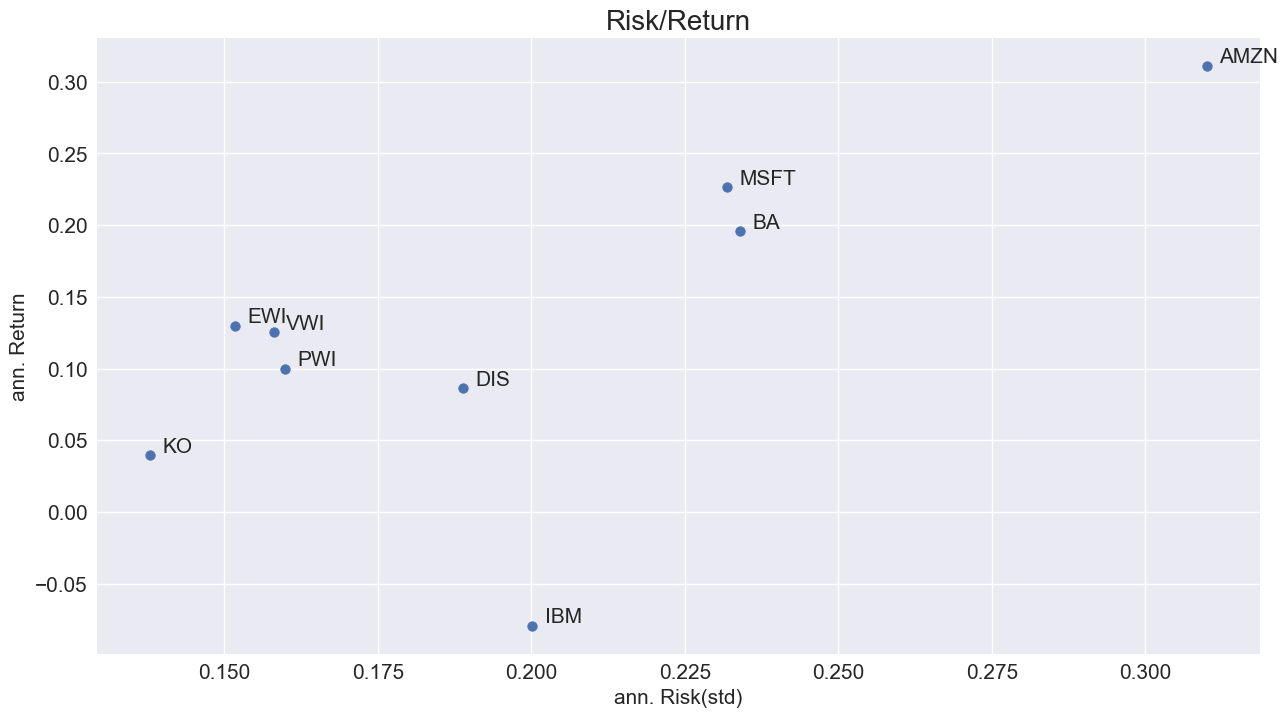

In [146]:
# Plot the annuale risk & return for each instrument and index:

summary.plot(kind = "scatter", # scatter plot 
             x = "Risk",  # x axis
             y = "Return", # y axis
             figsize = (15, 8), 
             s = 50, fontsize = 15)

# plot the name of the instrument / index
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)

plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

---

# Price Index vs. Performance/Total Return Index
> __Total Return Index__ the return from the index after take in account __dividents__.  

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

C:\Users\97250\AppData\Local\Temp\ipykernel_20368\3387111187.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [148]:
stocks = pd.read_csv("index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [149]:
stocks.head()

Adj Close                                 Close               \
                AMZN     BA   DIS    IBM    KO  MSFT  AMZN     BA   DIS   
Date                                                                      
2014-01-02     19.90 116.81 70.19 116.57 29.84 31.29 19.90 136.67 76.27   
2014-01-03     19.82 117.62 70.05 117.27 29.69 31.08 19.82 137.62 76.11   
2014-01-06     19.68 118.30 69.78 116.87 29.55 30.42 19.68 138.41 75.82   
2014-01-07     19.90 120.09 70.26 119.20 29.64 30.66 19.90 140.51 76.34   
2014-01-08     20.10 120.35 69.23 118.10 29.31 30.11 20.10 140.82 75.22   

                   ...  Open                       Volume                     \
              IBM  ...   DIS    IBM    KO  MSFT      AMZN       BA       DIS   
Date               ...                                                         
2014-01-02 177.37  ... 76.04 178.98 41.12 37.35  42756000  3366700   5200900   
2014-01-03 178.43  ... 76.30 177.66 40.68 37.20  44204000  3177400   4060700   
2014-01-06 177.82  ... 76.53 178.92 40.48 36.85  63412000  4196500   6816200   
2014-01-07 181.37  ... 76.12 178.19 40.48 36.33  38320000  4238500   4494900   
2014-01-08 179.70  ... 76.13 181.00 40.44 36.00  46330000  4236100  10900300   

                                         
                IBM        KO      MSFT  
Date                                     
2014-01-02  4755639  12698600  30632200  
2014-01-03  4250107  10403400  31134800  
2014-01-06  4254919  11036300  43603700  
2014-01-07  6205186  11872300  35802800  
2014-01-08  4815470  15339600  59971700  

[5 rows x 36 columns]

In [150]:
# Select the adjuseted close price column
adj_close = stocks["Adj Close"].copy()

In [151]:
# Compute the simple return of the adjusted close price
total_return = adj_close.pct_change().dropna()

In [152]:
# Here's the simple return of the adjusted close price:
total_return.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.00,0.01,-0.00,0.01,-0.00,-0.01
2014-01-06,-0.01,0.01,-0.00,-0.00,-0.00,-0.02
2014-01-07,0.01,0.02,0.01,0.02,0.00,0.01
2014-01-08,0.01,0.00,-0.01,-0.01,-0.01,-0.02
2014-01-09,-0.00,0.01,-0.00,-0.00,-0.01,-0.01


In [153]:
# save the close price
close = stocks["Close"].copy()

In [154]:
# compute the weights
# close price / sum close price of all instruments
weights = close.div(close.sum(axis = 1), axis = "index")

In [163]:
# Show the weigths over the time:
weights.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-03,0.04,0.28,0.16,0.36,0.08,0.08
2014-01-06,0.04,0.28,0.16,0.36,0.08,0.07
2014-01-07,0.04,0.28,0.15,0.37,0.08,0.07
2014-01-08,0.04,0.29,0.15,0.37,0.08,0.07


In [164]:
# senity check: sum of weigths for each time sum to 1. 
weights.sum(axis=1)

Date
2014-01-02   1.00
2014-01-03   1.00
2014-01-06   1.00
2014-01-07   1.00
2014-01-08   1.00
             ... 
2018-12-21   1.00
2018-12-24   1.00
2018-12-26   1.00
2018-12-27   1.00
2018-12-28   1.00
Length: 1257, dtype: float64

In [156]:
# PWI performance step 1:
# base of 100
norm["PWI_perf"] = 100
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92,99.81,100
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35,98.92,100
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41,99.87,100
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72,98.67,100


In [157]:
# PWI performance step 2:
# compute the PWI, based on the total return (simple return of adjusted close price) 
norm.iloc[1:, -1] = total_return.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

C:\Users\97250\AppData\Local\Temp\ipykernel_20368\2162611693.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[100.27142204 100.02096188 101.41160988 ... 172.70726492 174.30929789
 174.07865619]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  norm.iloc[1:, -1] = total_return.mul(weights.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)


In [158]:
norm

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-01-02,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-03,99.62,100.70,99.79,100.60,99.51,99.33,100.27,99.92,99.81,100.27
2014-01-06,98.91,101.27,99.41,100.25,99.04,97.23,100.02,99.35,98.92,100.02
2014-01-07,100.02,102.81,100.09,102.25,99.34,97.98,101.41,100.41,99.87,101.41
2014-01-08,100.99,103.04,98.62,101.32,98.23,96.23,100.72,99.72,98.67,100.72
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,346.12,222.84,136.65,59.80,116.99,264.34,149.48,175.33,171.80,168.60
2018-12-24,337.70,215.23,131.57,57.98,113.03,253.31,144.38,169.44,165.28,162.85
2018-12-26,369.60,229.70,138.76,60.04,115.45,270.61,153.13,179.08,174.90,172.71


In [159]:
summary = norm.pct_change().dropna().agg(["mean", "std"]).T

In [160]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)

In [161]:
summary

,mean,std
AMZN,0.31,0.31
BA,0.20,0.23
DIS,0.09,0.19
IBM,-0.08,0.20
KO,0.04,0.14
MSFT,0.23,0.23
PWI,0.10,0.16
EWI,0.13,0.15
VWI,0.13,0.16
PWI_perf,0.12,0.16


__Plot the `PWI` and the `PWI performance`__ 
- why `PWI performance` higher than `PWI`? beacuse the dividends paymants. 
    - `PWI performance` computed based on the **Adjusted close price**
    - `PWI` computed based on the **Close price**

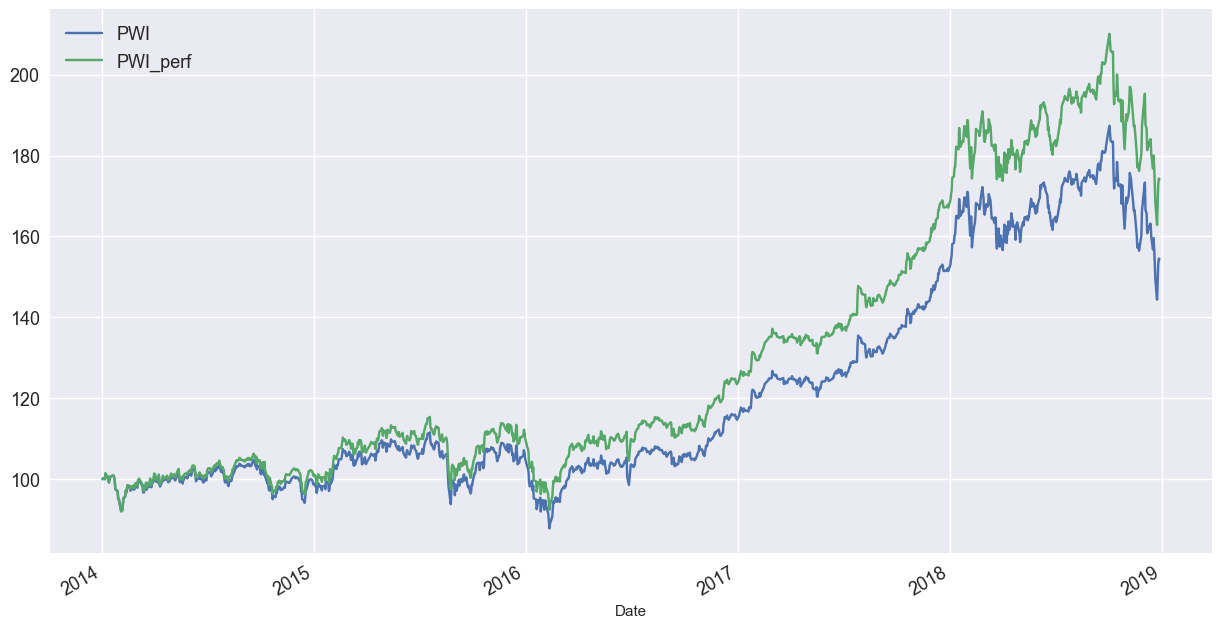

In [162]:
norm.iloc[:, [6, 9]].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

---

# Summary

> __`price-weighted` and `value-weighted` indices do not need frequent rebalancing as their weights adjust automatically based on stock prices or market capitalizations. On the other hand, ``equally weighted`` indices do require periodic rebalancing to maintain the equal weight distribution among the components.__